We want a soft way of calculating whether a point (in a grid) is inside or outside a given polygon. 
https://en.wikipedia.org/wiki/Point_in_polygon
By 'soft' we mean that the function is differentiable w.r.t the points inside the polygon and gives signial to nearby (neighboring) points (to allow the learning of 
The points need

We need a signal that says. This should/shouldnt have been within the polygon. Adjust the points to make this happen.


Potential approaches include;
* ray casting
* winding number
* approximation via triangles/boxes.

It seems like we could do this more efficiently by automatically ruling out all the points outside the extremal values of the polygons. `box(max(x), max(y), min(x), min(y))`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [226]:
# start with a simple polygon
poly = np.array([[-0.5, -0.5],
                 [0.0,  0.5],
                 [0.5, -0.5],
#                  [0.2, -0.3],
                 [-0.5, -0.5]])  # overlap for convenience

In [251]:
def winding(poly, points):
    num_verts = poly.shape[0]
    num_points = points.shape[0]
    diffs = poly.reshape((num_verts, 1, 2)) - points.reshape((1, num_points, 2))
    signs = (diffs[:-1, :, 0] < diffs[1:, :, 0]).astype(np.float) #/2 + (diffs[:-1, :, 1] < diffs[1:, :, 1]).astype(np.float)/2
    signs = signs * 2 - 1
    diffs /= np.sqrt(np.sum(diffs**2, axis=2, keepdims=True))
    cos_angles = np.sum(diffs[:-1, :, :] * diffs[1:, :, :], axis=2)
    angles = np.arccos(cos_angles)
    angles *= signs
    return np.sum(angles, axis=0) / (2.0 * np.pi)

In [252]:
test = np.array([[0.1, 0.0],
                 [0.0, 0.499],
                 [1.0, 0.0]])

In [253]:
winding(poly, test)

array([ 0.50636535,  0.70457791,  0.25      ])

In [254]:
coords = np.linspace(-1.0, 1.0, 100)
grid = np.vstack(np.meshgrid(coords, coords)).reshape((2, -1)).T
print(grid)
print(grid.shape)

[[-1.         -1.        ]
 [-0.97979798 -1.        ]
 [-0.95959596 -1.        ]
 ..., 
 [ 0.95959596  1.        ]
 [ 0.97979798  1.        ]
 [ 1.          1.        ]]
(10000, 2)


In [255]:
results = winding(poly, grid)

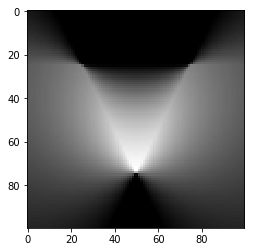

In [256]:
results = results.reshape((100, 100))
results = np.minimum(results, 1)
plt.imshow(results.reshape((100, 100)), interpolation=None, cmap="gray")

In [257]:
print(np.min(results), np.max(results))

(-3.0745361920813996e-15, 0.69829188494351402)


In [172]:
np.argmax(results)

2525

In [173]:
grid[3460]

array([ 0.21212121, -0.31313131])

(array([ 1497.,  1479.,  1405.,  1158.,   869.,   640.,   511.,   418.,
          378.,  1645.]),
 array([ 0.20077968,  0.28070171,  0.36062374,  0.44054577,  0.52046781,
         0.60038984,  0.68031187,  0.7602339 ,  0.84015594,  0.92007797,  1.        ]),
 <a list of 10 Patch objects>)

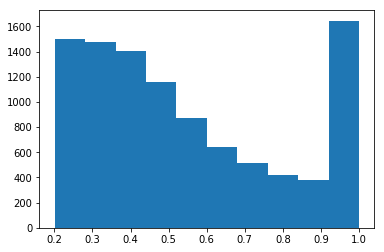

In [174]:
plt.hist(results.flatten())

In [177]:
np.arccos(np.linspace(-2, 2))

/home/ws_sc_2/.pyenv/versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,  2.78985515,  2.60049313,
        2.45831916,  2.3376563 ,  2.22969305,  2.13011904,  2.03641936,
        1.94695124,  1.86054803,  1.77632183,  1.69355338,  1.61162399,
        1.52996866,  1.44803927,  1.36527082,  1.28104463,  1.19464142,
        1.1051733 ,  1.01147361,  0.9118996 ,  0.80393635,  0.6832735 ,
        0.54109953,  0.3517375 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])